In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
#Loading and the data
import os
print(os.getcwd())


C:\Users\glodi mukomo


In [15]:
df = pd.read_csv(r'C:\Users\glodi mukomo\Downloads\Student_performance_data.csv')
df.head(10)



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [19]:
# Fill numeric columns with median, except for binary columns which will use mode to avoid potentially getting 0.5 as the median: 

binary_columns = ['Gender', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in df.select_dtypes(include='number').columns:
    if col not in binary_columns:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill categorical columns with mode

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove GPA outliers using IQR

Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['GPA'] >= Q1 - 1.5 * IQR) & (df['GPA'] <= Q3 + 1.5 * IQR)]

# Check for remaining missing values

print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [23]:
from sklearn.model_selection import train_test_split #Splitting the Data

# Define features (X) and target (y)
X = df.drop(['StudentID', 'GradeClass'], axis=1)  # Dropping non-predictive features
y = df['GradeClass']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Training a Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
model = LogisticRegression(max_iter=10000)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)


In [29]:
#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0  15   3   2   2]
 [  4  23  17   1   4]
 [  1  12  53  14   5]
 [  0   2  15  47  22]
 [  0   1   1   3 232]]


In [33]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.70      0.55      0.61        86
         4.0       0.88      0.98      0.92       237

    accuracy                           0.74       479
   macro avg       0.52      0.52      0.52       479
weighted avg       0.71      0.74      0.72       479



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.71
Recall: 0.74
F1 Score: 0.72


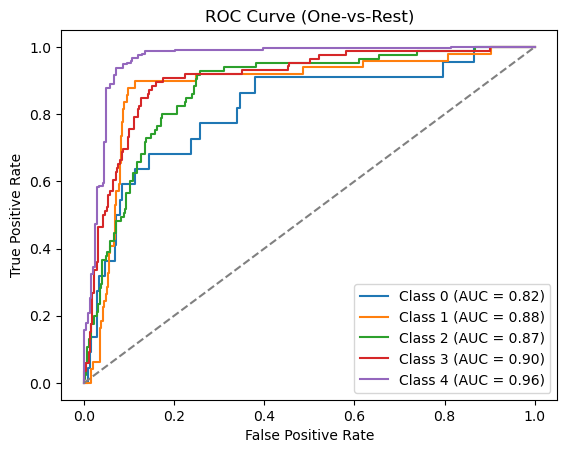

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels (convert to one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Adjust the classes according to your data
y_score = model.predict_proba(X_test)

# Calculate ROC and AUC for each class
fpr, tpr, thresholds = {}, {}, {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
import matplotlib.pyplot as plt
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()
